In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [9]:
m = 100
X = np.random.rand(m, 1) 
y = 4 + 3 * X + 0.3 * np.random.randn(m, 1)

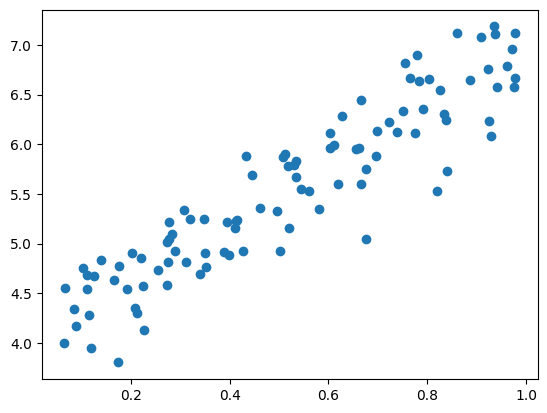

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
poly_reg = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

In [12]:
poly_reg.fit(X, y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('linearregression', LinearRegression())])

In [15]:
from sklearn.model_selection import learning_curve

train_size, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv = 5, scoring='neg_root_mean_squared_error')
train_errors = - train_scores.mean(axis = 1)
valid_errors = - valid_scores.mean(axis = 1)

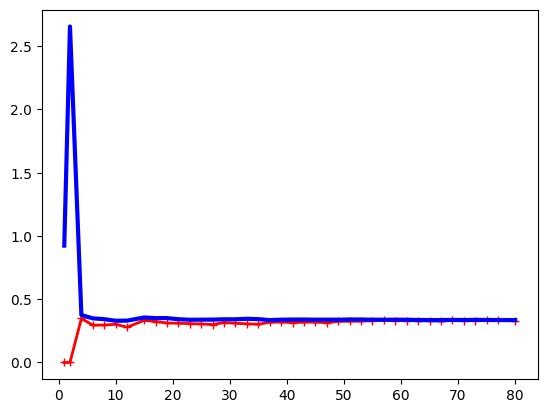

In [16]:
plt.plot(train_size, train_errors, 'r-+', linewidth = 2, label = 'train')
plt.plot(train_size, valid_errors, 'b-', linewidth= 3, label = 'test')


plt.show()

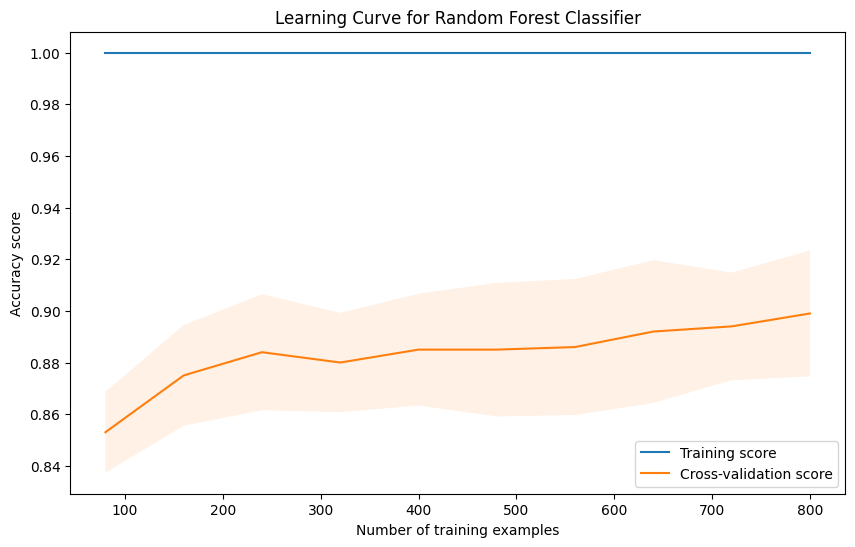

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate the learning curve data
train_sizes, train_scores, valid_scores = learning_curve(
    rf_classifier, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy score')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend(loc='best')
plt.show()

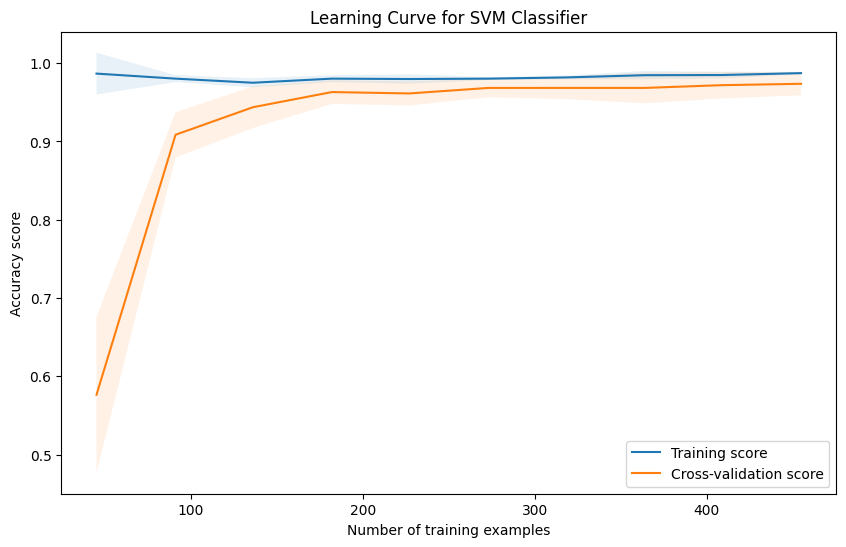

In [18]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an SVM Classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Generate the learning curve data
train_sizes, train_scores, valid_scores = learning_curve(
    svm_classifier, X_scaled, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy score')
plt.title('Learning Curve for SVM Classifier')
plt.legend(loc='best')
plt.show()

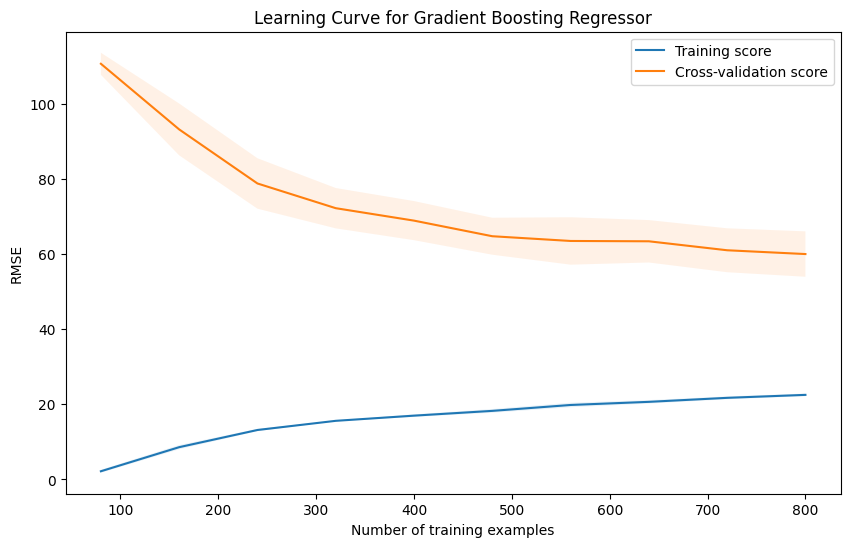

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Generate the learning curve data
train_sizes, train_scores, valid_scores = learning_curve(
    gb_regressor, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='neg_mean_squared_error', n_jobs=-1)

# Convert MSE to RMSE
train_rmse = np.sqrt(-train_scores)
valid_rmse = np.sqrt(-valid_scores)

# Calculate mean and standard deviation
train_mean = np.mean(train_rmse, axis=1)
train_std = np.std(train_rmse, axis=1)
valid_mean = np.mean(valid_rmse, axis=1)
valid_std = np.std(valid_rmse, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, valid_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('RMSE')
plt.title('Learning Curve for Gradient Boosting Regressor')
plt.legend(loc='best')
plt.show()